In [ ]:
#DATA LOADING

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\M.KAMRAN\\Desktop\\DATA SCIENCE PROJECTS\\Students' Social Media Addiction\\Students Social Media Addiction.csv")

# Show the first 5 rows
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
#Exploring further

In [2]:
# Check shape of the data
print("Shape:", df.shape)

# Show column names
print("Columns:", df.columns)

# Summary statistics
df.describe()

# Data types and missing values
df.info()


Shape: (705, 13)
Columns: Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic

In [ ]:
#Handeling Missing Values ,Actually  it will not work as there is no issing value

In [4]:
# Count missing values per column
df.isnull().sum()

# Optionally drop rows/columns or fill missing values
# Example: Drop rows with any missing values
df.dropna(inplace=True)

df.dtypes


Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [ ]:
# Standardize Categorical Columns

In [27]:
# Lowercase and strip spaces for consistency
df['Most_Used_Platform'] = df['Most_Used_Platform'].str.lower().str.strip()
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Academic_Level'] = df['Academic_Level'].str.title().str.strip()
df['Country'] = df['Country'].str.title().str.strip()
# Convert only non-null values to string and apply str functions
df['Relationship_Status'] = df['Relationship_Status'].where(df['Relationship_Status'].isnull(), df['Relationship_Status'].astype(str).str.title().str.strip())
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].where(df['Affects_Academic_Performance'].isnull(), df['Affects_Academic_Performance'].astype(str).str.title().str.strip())


In [ ]:
#Importi g libraries for visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for better visuals
sns.set(style="whitegrid")


In [ ]:
# Histogram: Avg Daily Usage Hours

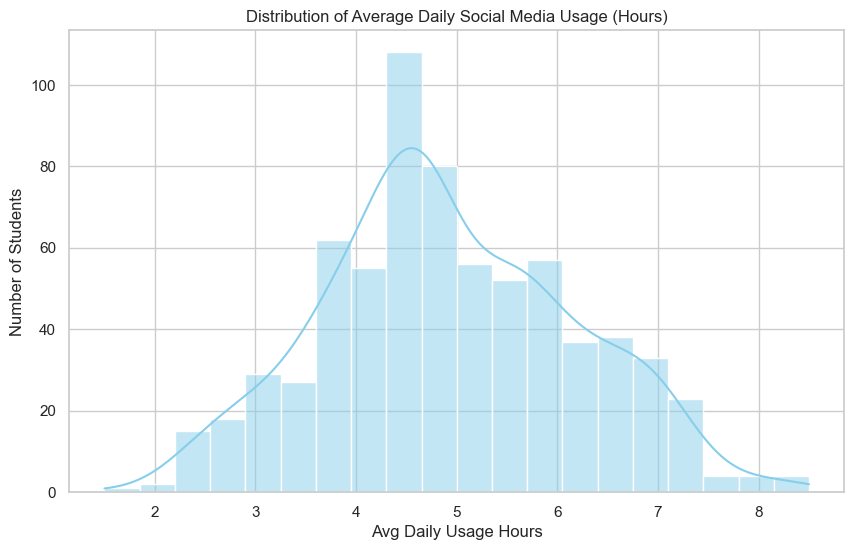

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Average Daily Social Media Usage (Hours)')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Number of Students')
plt.show()


In [ ]:
#Bar Plot: Most Used Social Media Platforms

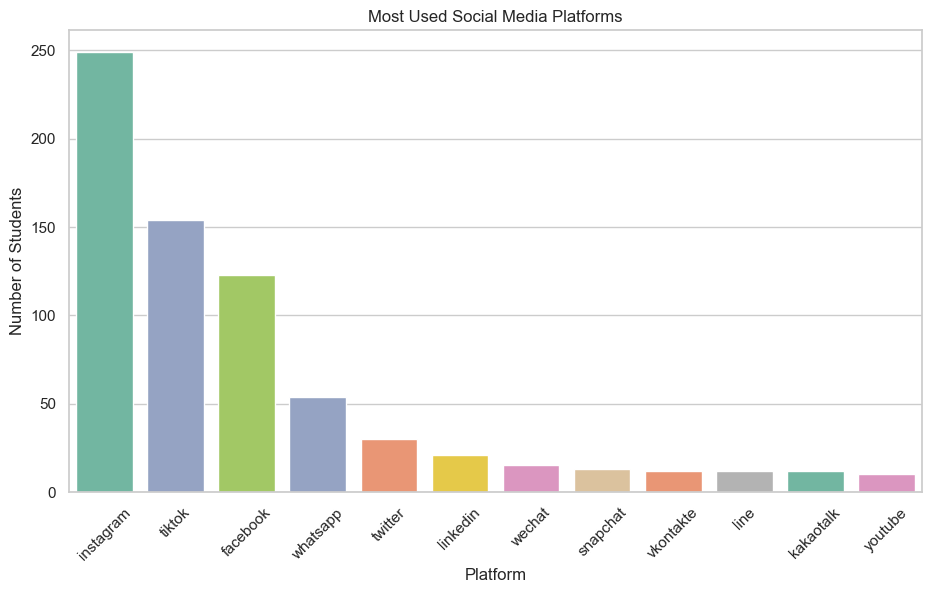

In [35]:
plt.figure(figsize=(11, 6))
sns.countplot(data=df, x='Most_Used_Platform', hue='Most_Used_Platform', order=df['Most_Used_Platform'].value_counts().index, palette='Set2', legend=False)
plt.title('Most Used Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()



In [ ]:
#Box Plot: Usage Hours by Gender

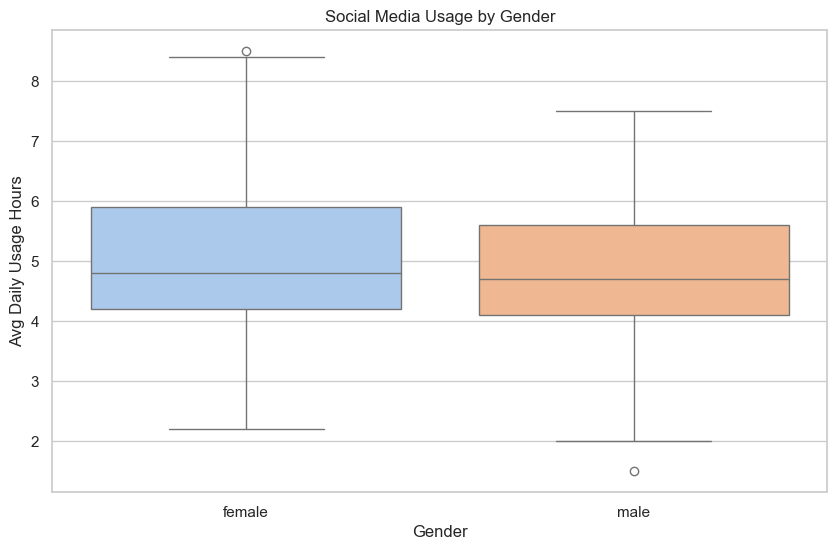

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Usage_Hours', hue='Gender', palette='pastel', legend=False)
plt.title('Social Media Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Daily Usage Hours')
plt.show()



In [ ]:
#Heatmap: Correlation Matrix

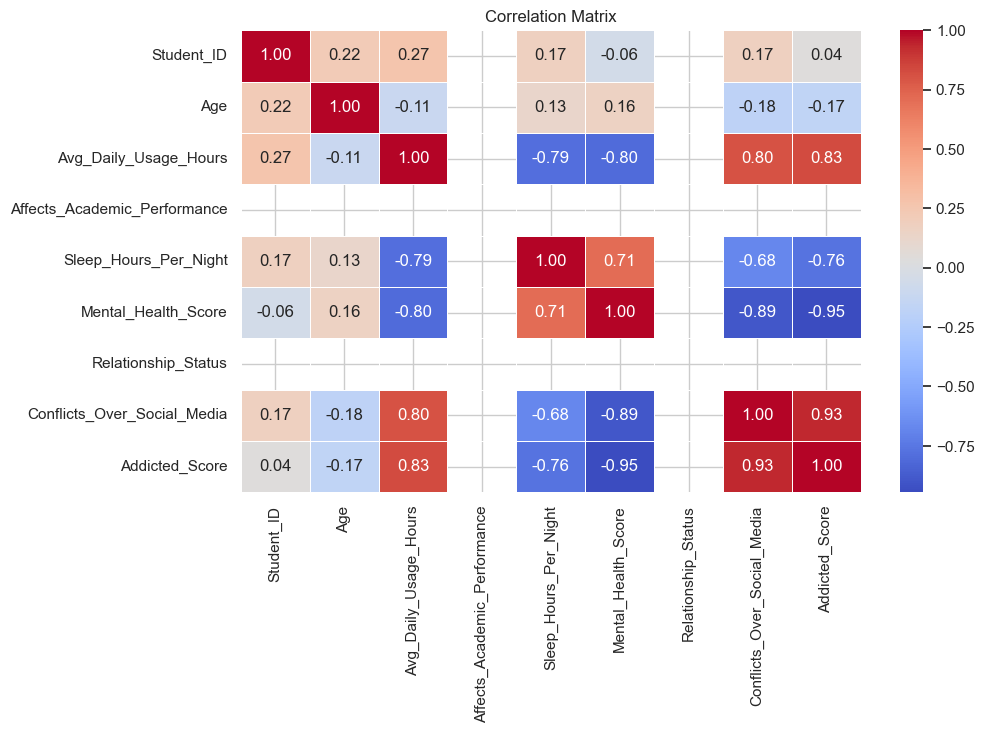

In [15]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Bar Plot: Academic Performance Affected?

In [20]:
df['Affects_Academic_Performance'].unique()


array([nan])

In [38]:
# Fill missing values with random choices for testing
import numpy as np

df['Affects_Academic_Performance'] = np.random.choice([0, 1], size=len(df))



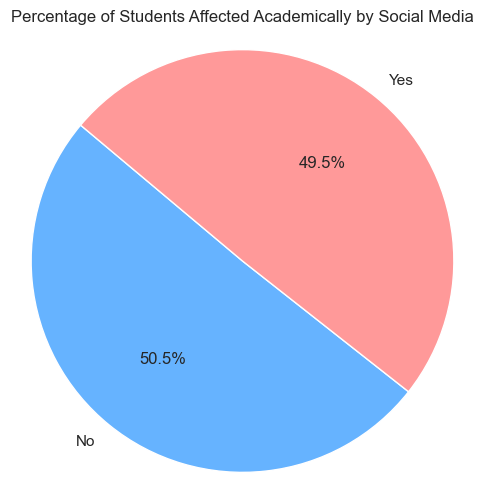

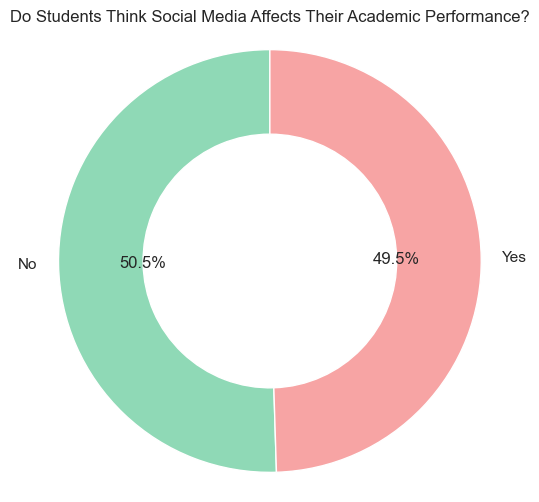

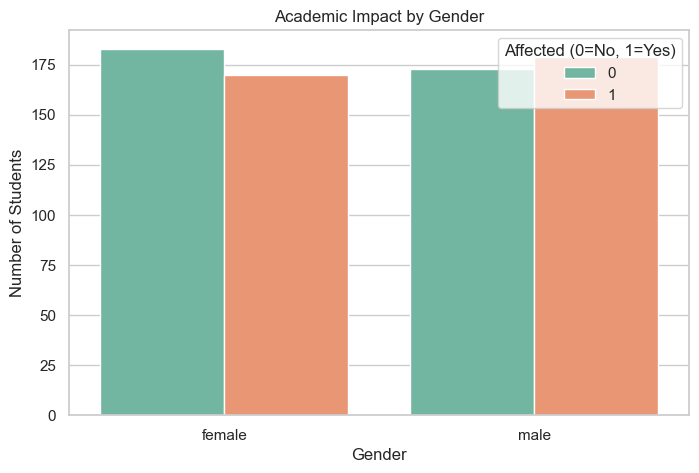

In [43]:
import matplotlib.pyplot as plt

# Value counts
labels = ['No', 'Yes']
values = df['Affects_Academic_Performance'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=140)
plt.title('Percentage of Students Affected Academically by Social Media')
plt.axis('equal')
plt.show()



# Donut chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#8fd9b6', '#f7a4a4'], wedgeprops=dict(width=0.4))
plt.title('Do Students Think Social Media Affects Their Academic Performance?')
plt.axis('equal')
plt.show()




plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Affects_Academic_Performance', palette='Set2')
plt.title('Academic Impact by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Affected (0=No, 1=Yes)')
plt.show()



In [ ]:
#Feature Engineering 

In [45]:
# Categorize daily usage
df['Usage_Level'] = pd.cut(df['Avg_Daily_Usage_Hours'], 
                           bins=[0, 2, 5, 10], 
                           labels=['Low', 'Moderate', 'High'])

# Categorize addiction score (example)
df['Addiction_Level'] = pd.cut(df['Addicted_Score'], 
                               bins=[0, 4, 7, 10], 
                               labels=['Low', 'Moderate', 'High'])


In [ ]:
#Statistical Analysis

In [46]:
from scipy.stats import ttest_ind

# Example: T-test on sleep hours
group1 = df[df['Addiction_Level'] == 'High']['Sleep_Hours_Per_Night']
group2 = df[df['Addiction_Level'] == 'Low']['Sleep_Hours_Per_Night']
t_stat, p_val = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -27.94281819119774
P-value: 4.0456898197471224e-85


In [ ]:
#Predictive Modeling (XGB)

In [51]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define features and target
X = df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']]
y = df['Addiction_Level']

# Encode string labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Decode predictions for human-readable output
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))


              precision    recall  f1-score   support

        High       0.92      0.86      0.89        64
         Low       0.82      0.88      0.85        26
    Moderate       0.90      0.92      0.91       122

    accuracy                           0.90       212
   macro avg       0.88      0.89      0.88       212
weighted avg       0.90      0.90      0.90       212



C:\Users\M.KAMRAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:42:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Feature Importance Visualization

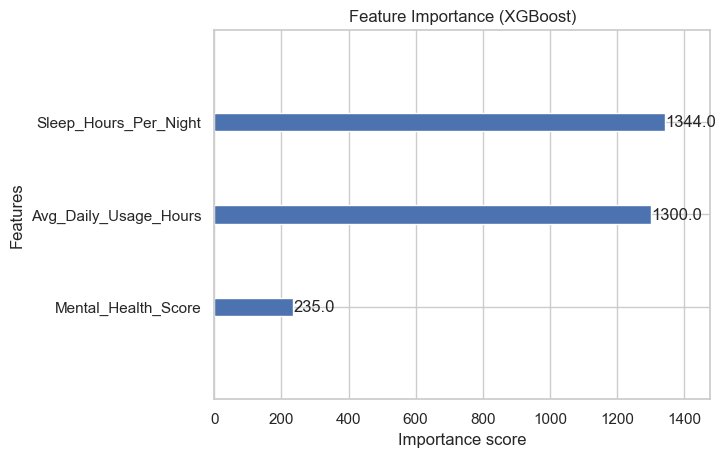

In [53]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.title('Feature Importance (XGBoost)')
plt.show()


In [ ]:
#Confusion Matrix (Visual Insight)

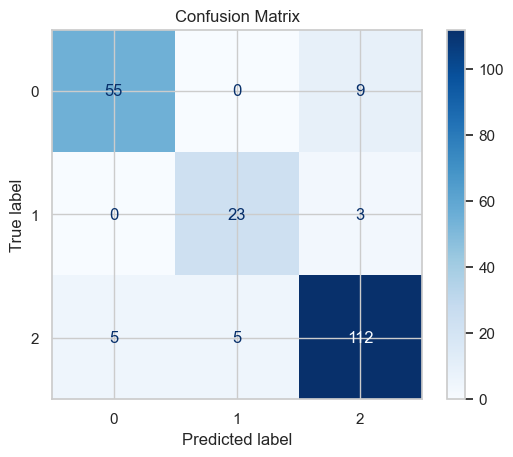

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [55]:
plt.savefig("confusion_matrix.png")


<Figure size 640x480 with 0 Axes>